# Predicting Doctor's Consultation Fee

    We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Training Dataset

In [2]:
df = pd.read_excel('Doc_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


## Test Dataset

In [3]:
td = pd.read_excel('Doc_Test.xlsx')
td

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


## Columns Description:

    - Qualification: Qualifications and Degrees held by the Doctor

    - Experience: Experience of the Doctor in number of years

    - Rating: Rating given by patients

    - Profile: Type of the Doctor

    - Miscellaeous_Info: Extra information about the Doctor

    - Fees: Fees charged by the Doctor

    - Place: Area and the city where the Doctor is located

## Let's Consider Training Dataset

In [4]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [5]:
df.shape

(5961, 7)

In [6]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
# checking any duplicate data
df.duplicated().sum()

40

In [8]:
# deleting duplocates
df=df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5921 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5921 non-null   object
 1   Experience          5921 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5919 non-null   object
 4   Profile             5921 non-null   object
 5   Miscellaneous_Info  3340 non-null   object
 6   Fees                5921 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 370.1+ KB


### Observations:
        - Fees column is in int Data-Type.
        - Rest of the columns are in object Data-Types.

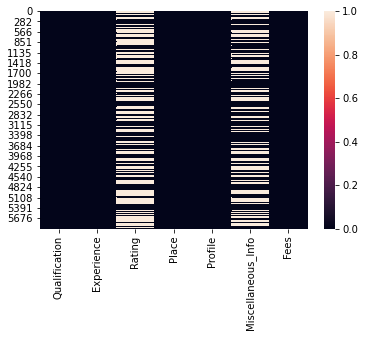

In [10]:
sns.heatmap(df.isnull())
plt.show()

### Observations:
        Columns such as Rating, Place, Miscellaneous_Info has missing values.

# Data Cleaning & Handling the NaN values.

## 1. Experience Column

### Removing 'years experience' from Experience column and Converting Experience column into 'int' Data-Type.

In [11]:
df['Experience']=df['Experience'].str.replace('years experience','')

In [12]:
df['Experience']=df['Experience'].astype(int)

## 2. Rating Column

### Removing Special-Character (%) from Rating column and Converting Rating column into 'int' Data-Type.

In [13]:
df['Rating']=df['Rating'].str.replace('%','')

In [14]:
df['Rating']=df['Rating'].replace(np.NaN,0)

In [15]:
df['Rating']=df['Rating'].astype(int)

In [16]:
df['Rating']=df['Rating'].replace(0,np.NaN)

### Filling the NaN values in the Rating column.

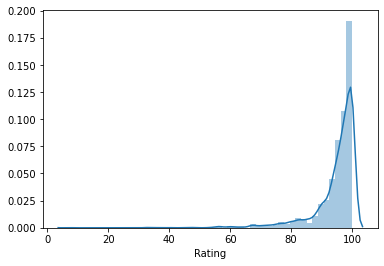

In [17]:
sns.distplot(df['Rating'])
plt.show()

### Observations:
        Since data is 'Not Normally Distributed', we can fill the NaN values with 'Median'.

In [18]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

## 3. Place Column

### Place column contains 'Area' and the 'City' where the Doctor is located.
### Let's extract 'Area' and 'City' names from Place column.

In [19]:
df['Area']=df['Place'].str.split(',').str[0]

In [20]:
df['City']=df['Place'].str.split(',').str[1]

### Handling the NaN Values in 'Area' & 'City' column

In [21]:
df['Area'].isnull().sum()

2

In [22]:
df['City'].isnull().sum()

3

### Since 'Area' & 'City' column has Categorical values, we can fill the NaN values with 'most frequently repeated values' (Mode values).

In [23]:
df['Area'].fillna(df['Area'].mode()[0],inplace=True)

In [24]:
df['City'].fillna(df['City'].mode()[0],inplace=True)

### Since we extracted relevant information from Place column, we can drop this column.

In [25]:
df.drop('Place',axis=1,inplace=True)

## 4. Qualification Column

In [26]:
len(df['Qualification'].unique())

1420

In [27]:
df['Qualification'].unique()[:40]

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', 'BSc - Zoology, BAMS', 'BAMS',
       'BHMS', 'BDS', 'MBBS, MD - General Medicine', 'BSc, BDS',
       'MBBS, MS, DNB - ENT', 'BDS, MDS',
       'BDS, MDS - Oral & Maxillofacial Surgery',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO)',
       'MBBS, MF- Homeopathy', 'MBBS, MS - ENT', 'MBBS', 'MDS, DNB, BDS',
       'MBBS, DNB - ENT',
       'MBBS, Fellowship of College of General Practice (FCGP)',
       'MBBS, DDVL', 'MBBS, IBCLC (USA)',
       'MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)',
       'Diploma in Dermatology, MBBS',
       'MBBS, DDVL, Fellowship in Aesthetic Medicine',
       'DM - Neurology, MD - Pediatrics, MBBS',
       'BDS, MDS - Oral & Maxillofacial Surgery, Fellowship in Cleft Lip and Craniofacial Surgery',
       'BHMS, Diploma in Cosmetology', 'MBBS, MS - ENT, DN

### Observations:

        - Qualification column has lots of Data/Information. 
        - Some Doctors have only 'Single Degree', some have 'Double Degree', and some Doctors have 'Multiple Degree'.       

### Let's Convert 'Qualification' column into 'Total No. Of Qualification' column.

In [28]:
Qualification = list(df['Qualification'])

Total_No_Of_Qualification=[]
for i in Qualification:
    Total_No_Of_Qualification.append(len(i.split(',')))

In [29]:
df['Total No. Of Qualification']=Total_No_Of_Qualification

### Since we extracted relevant information from 'Qualification' column, we can therefore drop this column.

In [30]:
df.drop('Qualification',axis=1,inplace=True)

In [31]:
df.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City,Total No. Of Qualification
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,2
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,2
2,9,97.0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,2
3,12,97.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,2
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1


## 5. Miscellaneous_Info Column

### Observations:
        Since this column gives information such as 'Rating', 'Area', 'City', which are already known to us, hence we can drop this column.

In [32]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [33]:
df.head()

,Experience,Rating,Profile,Fees,Area,City,Total No. Of Qualification
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,2
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,2
2,9,97.0,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,12,97.0,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,1


# EDA

## Univariate Analysis

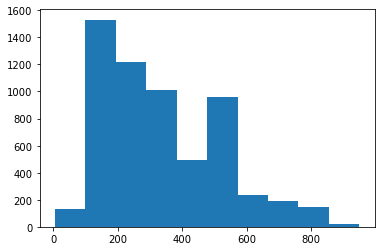

In [34]:
plt.hist(df['Fees'])
plt.show()

### Observations:
        - Doctors 'Fees' ranges from 5 to 950.
        - Majority of Doctors 'Fees' ranges from 100 to 500.

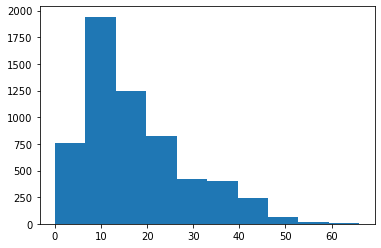

In [35]:
plt.hist(df['Experience'])
plt.show()

### Observations:
        - Doctors 'Experience' ranges from 0 to 70 years.
        - Majority of Doctors 'Experience' ranges from 10 to 20 years.

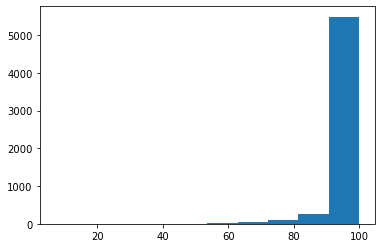

In [36]:
plt.hist(df['Rating'])
plt.show()

### Observations:
        Majority of Doctors have 'Rating' of 90% to 100%.

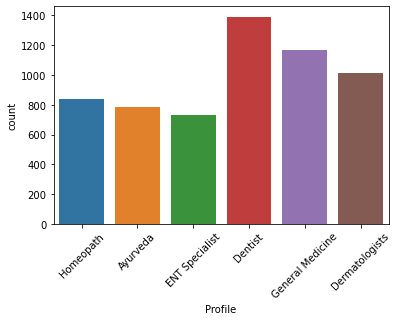

In [37]:
sns.countplot(df['Profile'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Majority of Doctors are Dentist, General Medicine practitioner, Dermatologists, Homeopath.   

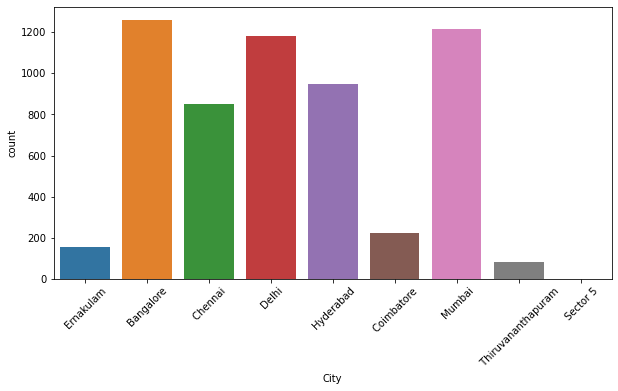

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df['City'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Majority of Doctors are from Bangalore, Mumbai, Delhi, Hyderabad.               

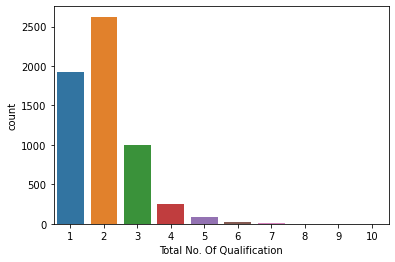

In [39]:
sns.countplot(df['Total No. Of Qualification'])
plt.show()

### Observations:
        Majority of Doctors have Single to Double Degree. 

## Bivariate Analysis

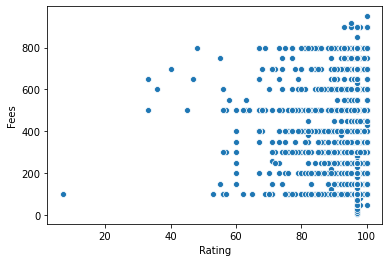

In [40]:
sns.scatterplot(df['Rating'],df['Fees'])
plt.show()

### Observations:
        Doctors having higher 'Rating' charge higher 'Fees'.

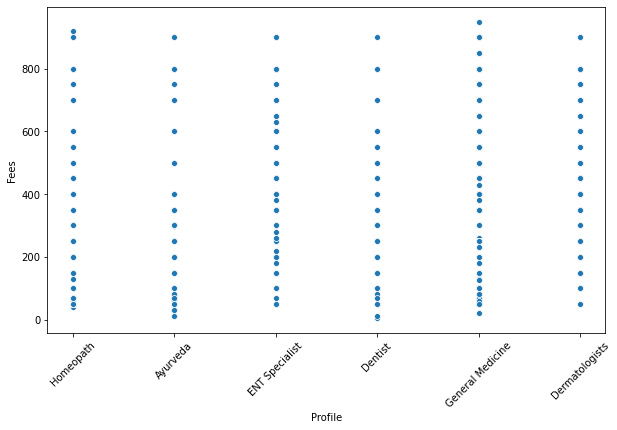

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Profile'],df['Fees'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        General Medicine practitioner, Homeopath practitioner charge higher 'Fees'.

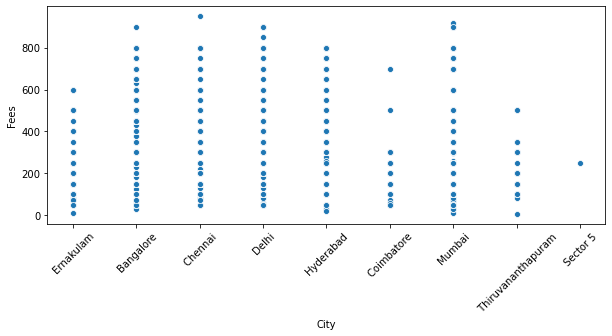

In [42]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['City'],df['Fees'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Doctors 'Fees' are higher in Chennai, Mumbai, Delhi, Bangalore.

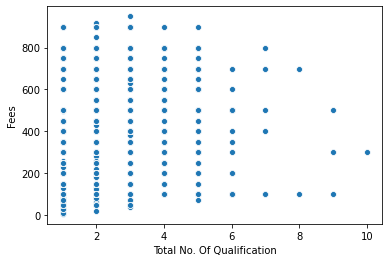

In [43]:
sns.scatterplot(df['Total No. Of Qualification'],df['Fees'])
plt.show()

### Observations:
        Doctors with 3, 2, 4, 5 Degrees charge higher 'Fees'.

## Correlation Matrix

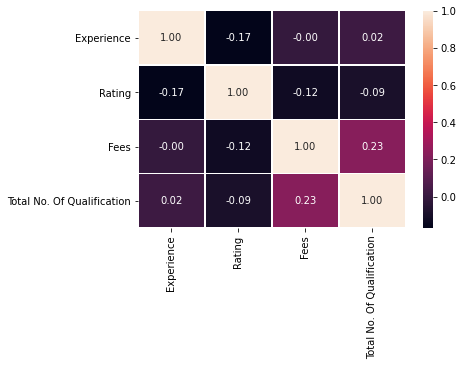

In [44]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.5)
plt.show()

### Observations:
        Total No. Of Qualification column has good correlation with Target column.

## City wise 'Fees' analysis.

### 1. Bangalore

In [45]:
Bangalore = df.groupby('City').get_group(' Bangalore')
Bangalore

,Experience,Rating,Profile,Fees,Area,City,Total No. Of Qualification
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,2
2,9,97.0,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,12,97.0,Ayurveda,250,Bannerghatta Road,Bangalore,2
7,10,99.0,Dentist,200,Arekere,Bangalore,1
19,19,100.0,General Medicine,150,HSR Layout,Bangalore,1
...,...,...,...,...,...,...,...
5947,6,97.0,Homeopath,100,Malleswaram,Bangalore,1
5950,4,100.0,Dermatologists,350,Konanakunte,Bangalore,4
5951,4,97.0,Dentist,200,HAL,Bangalore,2
5953,35,92.0,Homeopath,100,Malleswaram,Bangalore,3


In [46]:
Bangalore_Areas=Bangalore.groupby('Area')['Fees'].mean().reset_index()
Bangalore_Areas

,Area,Fees
0,AECS Layout,500.000000
1,Abbigere,100.000000
2,Adugodi,225.000000
3,Akshaya nagar,250.000000
4,Arekere,208.333333
...,...,...
149,Wilson Garden,300.000000
150,Yelahanka,330.344828
151,Yelahanka New Town,314.285714
152,Yeshwanthpur,383.333333


In [47]:
Bangalore_Areas.sort_values('Fees',ascending=False)[:5]

,Area,Fees
39,Harlur,700.000000
109,Old Airport Road,667.857143
101,Millers Road,633.333333
26,Dickenson Road,600.000000
24,Cunningham Road,600.000000


### Observations:
        In Bangalore, Doctors 'Fees' are higher in Areas of Harlur, Old Airport Road.

## 2. Ernakulam

In [48]:
Ernakulam = df.groupby('City').get_group(' Ernakulam')
Ernakulam

,Experience,Rating,Profile,Fees,Area,City,Total No. Of Qualification
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,2
9,23,97.0,Dentist,100,Athani,Ernakulam,2
23,31,97.0,General Medicine,100,Thammanam,Ernakulam,2
104,30,98.0,Dentist,300,Kadavanthra,Ernakulam,2
116,9,97.0,Dentist,200,Vyttila,Ernakulam,1
...,...,...,...,...,...,...,...
5601,6,97.0,Dentist,200,Ernakulam North,Ernakulam,2
5789,44,97.0,General Medicine,100,Edapally,Ernakulam,2
5863,14,94.0,Dermatologists,300,Kadavanthra,Ernakulam,2
5908,13,97.0,ENT Specialist,200,Edapally,Ernakulam,3


In [49]:
Ernakulam_Areas=Ernakulam.groupby('Area')['Fees'].mean().reset_index()
Ernakulam_Areas

,Area,Fees
0,Aluva,200.000000
1,Angamaly,100.000000
2,Athani,100.000000
3,Banerji Road,137.500000
4,Changampuzha Nagar,250.000000
5,Cherai,500.000000
6,Chullickal,100.000000
7,Edakochi,200.000000
8,Edapally,186.363636
9,Edapally North,100.000000


In [50]:
Ernakulam_Areas.sort_values('Fees',ascending=False)[:5]

,Area,Fees
5,Cherai,500.0
16,Kakkanad West,300.0
12,Ernakulam North,300.0
14,Kadavanthra,300.0
46,Thrikkakara,275.0


### Observations:
        In Ernakulam, Doctors 'Fees' are higher in Areas of Cherai, Kakkanad West.

In [51]:
df.head()

,Experience,Rating,Profile,Fees,Area,City,Total No. Of Qualification
0,24,100.0,Homeopath,100,Kakkanad,Ernakulam,2
1,12,98.0,Ayurveda,350,Whitefield,Bangalore,2
2,9,97.0,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,12,97.0,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,20,100.0,Ayurveda,250,Keelkattalai,Chennai,1


In [52]:
df['Area'].unique()

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani', 'Thousand Lights', 'Somajiguda', 'Coimbatore Racecourse',
       'Jubilee Hills', 'Kondli', 'Saroor Nagar', 'Tambaram West',
       'Purasawakkam', 'KPHB', 'HSR Layout', 'Pollachi',
       'Vasundhra Enclave', 'Chembur', 'Thammanam', 'Andheri', 'Pattom',
       'Kukatpally', 'Vadavalli', 'Defence Colony', 'Banjara Hills',
       'Sion West', 'CR Park', 'Mogappair East', 'IP Extension',
       'Safdarjung Enclave', 'New Friends Colony', 'Borivali West',
       'Saket', 'Malad', 'Hyder Nagar', 'Dahisar West', 'RT Nagar',
       'Powai', 'Basheerbagh', 'Musheerabad', 'AS Rao Nagar', 'Madhapur',
       'Gandhinagar', 'Chetpet', 'Vileparle East', 'Yelahanka New Town',
       'Kodambakkam', 'Malleswaram', 'Pallikaranai', 'Nallakunta',
       'Paschim Vihar', 'Meera Bagh', 'Chattarpur', 'Andheri West',
       'Himayat Nagar', 'Adambakka

In [53]:
df.drop('Area',axis=1,inplace=True)

### Let's Convert Categorical column into Numerical column.

In [54]:
profile=df['Profile']
profile=pd.get_dummies(profile)
profile.head()

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [55]:
city=df['City']
city=pd.get_dummies(city)
city.head()

,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [56]:
df=pd.concat([df,profile,city],axis=1)

In [57]:
df.head()

,Experience,Rating,Profile,Fees,City,Total No. Of Qualification,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,24,100.0,Homeopath,100,Ernakulam,2,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,12,98.0,Ayurveda,350,Bangalore,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9,97.0,ENT Specialist,300,Bangalore,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,12,97.0,Ayurveda,250,Bangalore,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Chennai,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
df.drop(['Profile','City',' Sector 5'],axis=1,inplace=True)

## Checking Outliers

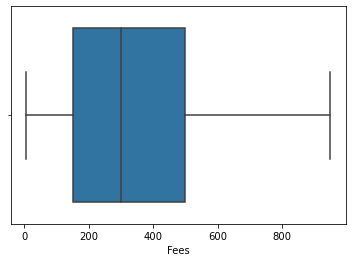

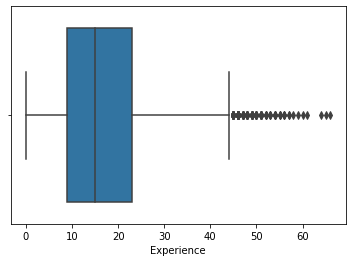

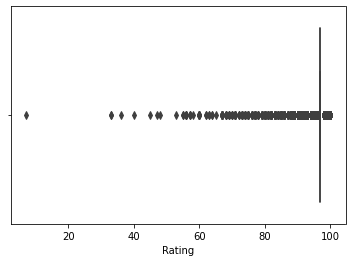

In [59]:
for i in ['Fees','Experience','Rating']:
    sns.boxplot(df[i])
    plt.show()

### Observations:
        From above boxplots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [60]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [61]:
np.where(z>3)

(array([   0,    9,   12,   18,   20,   23,   25,   28,   49,   55,   57,
          58,   67,   70,   77,   80,   85,  102,  104,  105,  110,  116,
         118,  140,  144,  148,  151,  159,  174,  176,  178,  183,  185,
         203,  204,  209,  209,  210,  211,  218,  227,  239,  261,  266,
         275,  291,  293,  298,  308,  309,  312,  316,  317,  322,  325,
         333,  344,  353,  363,  372,  373,  376,  377,  379,  391,  394,
         409,  414,  458,  465,  471,  472,  490,  497,  501,  517,  533,
         545,  550,  553,  560,  572,  579,  580,  583,  588,  592,  600,
         606,  627,  628,  635,  651,  652,  669,  675,  682,  688,  694,
         703,  713,  721,  726,  744,  757,  782,  783,  793,  805,  810,
         811,  825,  830,  840,  846,  848,  863,  890,  896,  896,  897,
         899,  906,  913,  917,  917,  936,  950,  963,  974,  975,  982,
         985,  986,  990,  993, 1003, 1010, 1012, 1015, 1019, 1038, 1043,
        1046, 1056, 1057, 1066, 1069, 

In [62]:
# Threshold
cf = df[(z<3).all(axis=1)]

In [63]:
print(df.shape, '\t\t' ,cf.shape)

(5921, 18) 		 (5161, 18)


In [64]:
# percentage loss of data
per_loss = ((5921-5161)/5921)*100
per_loss

12.835669650396891

### Since significant amount (> 5%) of data is lost during outlier removal, we are not going with Z-score method of removing outliers.

## Checking Skewness

In [65]:
df.skew()

Experience                    1.001498
Rating                       -5.237719
Fees                          0.746366
Total No. Of Qualification    1.431267
Ayurveda                      2.173977
Dentist                       1.250802
Dermatologists                1.750439
ENT Specialist                2.296977
General Medicine              1.520587
Homeopath                     2.053355
 Bangalore                    1.404989
 Chennai                      2.027752
 Coimbatore                   4.833932
 Delhi                        1.501965
 Ernakulam                    5.978627
 Hyderabad                    1.854225
 Mumbai                       1.460312
 Thiruvananthapuram           8.218072
dtype: float64

### Observations:
        Acceptable range of skewness is +/- 0.5, hence data is skewed.

## Splitting Data

In [66]:
x=df.drop('Fees',axis=1)
y=df['Fees']

In [67]:
print(x.shape,'\t\t',y.shape)

(5921, 17) 		 (5921,)


## Removing Skewness

In [68]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [69]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
# finding the best random_state

s=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2=r2_score(y_test,y_pred)
    if r2>s:
        s=r2
        best_random_state=i
        
print(f" Best r2_score is {s*100} which is found on random_state {best_random_state}")

 Best r2_score is 21.71546886971736 which is found on random_state 298


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=best_random_state)

# Finding The Best Model

In [73]:
mod_list=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SGDRegressor(),GammaRegressor(),SVR(),
         DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
         GradientBoostingRegressor()]

In [74]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    r2=r2_score(y_test,y_pred)
    print('r2_score:',r2*100)
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*****************************************************************************************')

LinearRegression()
r2_score: 21.71546886971736
Training score: 15.75165355192788
Error:
Mean absolute error: 132.00967949600792
Mean squared error: 28689.122942307687
Root mean squared error: 169.37863779800477
*****************************************************************************************
Lasso()
r2_score: 21.455157097440015
Training score: 15.724042624490265
Error:
Mean absolute error: 132.31665499153672
Mean squared error: 28784.5200320056
Root mean squared error: 169.66001306143295
*****************************************************************************************
Ridge()
r2_score: 21.73901903142793
Training score: 15.759481277871412
Error:
Mean absolute error: 131.93557859000381
Mean squared error: 28680.49245714196
Root mean squared error: 169.3531589818801
*****************************************************************************************
ElasticNet()
r2_score: 19.30539663657044
Training score: 14.639735610270765
Error:
Mean absolute error: 135.773029318286

### Observations:
        - From above it is evident that we are getting low 'r2 score'.
        - Let's select Gradient Boosting Regressor and perform hyperparameter tuning and see what is the 'r2 score' we are going to get.

In [75]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2_score:',r2*100)
print('Training score:',gbr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 23.617674107311835
Training score: 23.520752052876492
Error:
Mean absolute error: 129.94377865065317
Mean squared error: 27992.017152250275
Root mean squared error: 167.30815028638108


## Hyper-parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

para = {
    'loss':['ls','lad','huber','quantile'],
#     'criterion':['friedman_mse','mse','mae'],
    'max_features':['auto','sqrt','log2'],
    'warm_start':[True,False]
}

In [77]:
gscv=GridSearchCV(gbr,para,scoring='r2',cv=2)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             scoring='r2')

In [78]:
gscv.best_params_

{'loss': 'ls', 'max_features': 'log2', 'warm_start': False}

In [79]:
gbr=GradientBoostingRegressor(loss='ls',max_features='log2',warm_start=False)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2_score:',r2*100)
print('Training score:',gbr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 24.010141233973282
Training score: 21.849556825296823
Error:
Mean absolute error: 129.70197736939437
Mean squared error: 27848.18876770179
Root mean squared error: 166.87776594771933


### Observations:
        - we are getting low 'r2 score'.

    Since we are getting low 'r2 score'.
    Let's consider Target column and convert Fees amount into 4 groups,
        - 0 -- 0 to 250 Rs
        - 1 -- 251 to 500 Rs
        - 2 -- 501 to 750 Rs 
        - 3 -- 751 and above

In [80]:
fees = list(df['Fees'])

Fees=[]
for i in fees:
    if i>=0 and i<=250:
        Fees.append(0)
    elif i>=251 and i<=500:
        Fees.append(1)
    elif i>=501 and i<=750:
        Fees.append(2)
    else:
        Fees.append(3)

In [81]:
df['Doc Fees']=Fees

In [82]:
df.drop('Fees',axis=1,inplace=True)

In [83]:
df['Doc Fees'].unique()

array([0, 1, 2, 3], dtype=int64)

### Observations:
        - 0 -- 0 to 250 Rs
        - 1 -- 251 to 500 Rs
        - 2 -- 501 to 750 Rs 
        - 3 -- 751 and above

In [84]:
# Splitting Data
x=df.drop('Doc Fees',axis=1)
y=df['Doc Fees']


# Removing Skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')


# Standardizing Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [86]:
# finding the best random_state

acc=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on random_state {best_random_state}")

 Best Accuracy score is 55.232950708980425 which is found on random_state 664


In [87]:
# finding the best cv

cv=0
for i in range(2,20):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross val score is {cv*100} which is found on cv = {best_cv}")

 Best Cross val score is 52.15336834133255 which is found on cv = 4


# Finding The Best Model

In [88]:
mod_list=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

In [89]:
for mod in mod_list:
    print(mod)
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    print('Training score',mod.score(x_train,y_train)*100)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    print('Cross val score:',cv_score*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('*****************************************************************************************')

DecisionTreeClassifier()
Training score 89.009009009009
Accuracy score: 49.696151249155974
Cross val score: 51.76452911898842
[[452 228  31   7]
 [274 265  62  12]
 [ 37  56  14   2]
 [ 19   7  10   5]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       718
           1       0.48      0.43      0.45       613
           2       0.12      0.13      0.12       109
           3       0.19      0.12      0.15        41

    accuracy                           0.50      1481
   macro avg       0.34      0.33      0.33      1481
weighted avg       0.49      0.50      0.49      1481

*****************************************************************************************
SVC()
Training score 61.95945945945947
Accuracy score: 60.76975016880486
Cross val score: 59.8041991573046
[[553 165   0   0]
 [266 347   0   0]
 [ 40  69   0   0]
 [ 20  21   0   0]]
              precision    recall  f1-score   support

           0       0.63      0.77

### Observations:
        - From above it is evident that Gradient Boosting Classifier is performing better.
        - Lets's perform hyperparameter tuning on Gradient Boosting Classifier model.

In [90]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print('Training score',gbc.score(x_train,y_train)*100)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(gbc,x,y,cv=i).mean()
print('Cross val score:',cv_score*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training score 63.94144144144144
Accuracy score: 61.10735989196488
Cross val score: 60.04052922313203
[[535 175   6   2]
 [243 363   5   2]
 [ 27  78   4   0]
 [  8  25   5   3]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       718
           1       0.57      0.59      0.58       613
           2       0.20      0.04      0.06       109
           3       0.43      0.07      0.12        41

    accuracy                           0.61      1481
   macro avg       0.46      0.36      0.37      1481
weighted avg       0.58      0.61      0.59      1481



## Hyper-parameter Tuning

In [91]:
parameter = {
    'loss':['deviance','exponential'],
#     'criterion':['friedman_mse','mse','mae'],
    'max_features':['auto','sqrt','log2'],
    'warm_start':[True,False]
}

In [92]:
gscv=GridSearchCV(gbc,parameter,scoring='accuracy',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             scoring='accuracy')

In [93]:
gscv.best_params_

{'loss': 'deviance', 'max_features': 'log2', 'warm_start': True}

In [94]:
gbc=GradientBoostingClassifier(loss='deviance',max_features='log2',warm_start=True)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print('Training score',gbc.score(x_train,y_train)*100)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(gbc,x,y,cv=i).mean()
print('Cross val score:',cv_score*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training score 63.17567567567568
Accuracy score: 60.97231600270088
Cross val score: 59.854914927685286
[[537 174   7   0]
 [245 364   4   0]
 [ 29  78   2   0]
 [ 11  27   3   0]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       718
           1       0.57      0.59      0.58       613
           2       0.12      0.02      0.03       109
           3       0.00      0.00      0.00        41

    accuracy                           0.61      1481
   macro avg       0.34      0.34      0.33      1481
weighted avg       0.56      0.61      0.58      1481



In [95]:
import joblib

In [96]:
# Saving the best model for production

In [97]:
joblib.dump(gbr,'Fees_Model(Regressor).obj')

['Fees_Model(Regressor).obj']

In [98]:
joblib.dump(gbc,'Fees_Model(Classifier).obj')

['Fees_Model(Classifier).obj']

## Let's Consider Test Dataset

In [99]:
td

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [100]:
td.shape

(1987, 6)

In [101]:
td.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [102]:
# checking any duplicate data
td.duplicated().sum()

11

In [103]:
# deleting duplocates
td=td.drop_duplicates()

In [104]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1976 non-null   object
 1   Experience          1976 non-null   object
 2   Rating              897 non-null    object
 3   Place               1975 non-null   object
 4   Profile             1976 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 108.1+ KB


### Observations:
        - All columns are in object Data-Types.

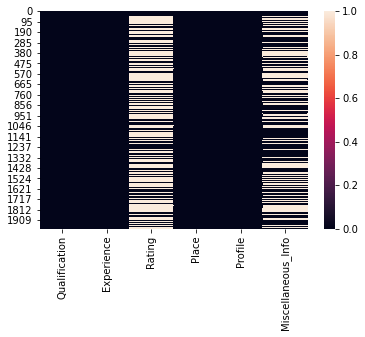

In [105]:
sns.heatmap(td.isnull())
plt.show()

### Observations:
        Columns such as Rating, Place, Miscellaneous_Info has missing values.

# Data Cleaning And Handling the NaN values.

## 1. Experience column

### Removing 'years experience' from Experience column and Converting Experience column into 'int' Data-Type.

In [106]:
td['Experience']=td['Experience'].str.replace('years experience','')

In [107]:
td['Experience']=td['Experience'].astype(int)

## 2. Rating column

### Removing Special-Character (%) from Rating column and Converting Rating column into 'int' Data-Type.

In [108]:
td['Rating']=td['Rating'].str.replace('%','')

In [109]:
td['Rating']=td['Rating'].replace(np.NaN,0)

In [110]:
td['Rating']=td['Rating'].astype(int)

In [111]:
td['Rating']=td['Rating'].replace(0,np.NaN)

### Filling the NaN values in the Rating column.

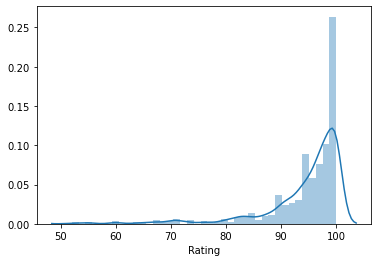

In [113]:
sns.distplot(td['Rating'])
plt.show()

### Observations:
        Since data is 'Not Normally Distributed', we can fill the NaN values with 'Median'.

In [114]:
td['Rating']=td['Rating'].fillna(td['Rating'].median())

## 3. Place column

### Place column contains 'Area' and the 'City' where the Doctor is located.
### Let's extract 'Area' and 'City' names from Place column.

In [115]:
td['Area']=td['Place'].str.split(',').str[0]

In [116]:
td['City']=td['Place'].str.split(',').str[1]

### Handling the NaN Values in 'Area' & 'City' column

In [117]:
td['Area'].isnull().sum()

1

In [118]:
td['City'].isnull().sum()

1

### Since 'Area' & 'City' column has Categorical values, we can fill the NaN values with 'most frequently repeated values' (Mode values).

In [119]:
td['Area'].fillna(td['Area'].mode()[0],inplace=True)

In [120]:
td['City'].fillna(td['City'].mode()[0],inplace=True)

### Since we extracted relevant information from Place column, we can drop this column.

In [121]:
td.drop('Place',axis=1,inplace=True)

## 4. Qualification column

In [122]:
len(td['Qualification'].unique())

630

In [123]:
td['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

### Observations:

        - Qualification column has lots of Data/Information. 
        - Some Doctors have only 'Single Degree', some have 'Double Degree', and some Doctors have 'Multiple Degree'.       

### Let's Convert 'Qualification' column into 'Total No. Of Qualification' column.

In [124]:
Qualification = list(td['Qualification'])

Total_No_Of_Qualification=[]
for i in Qualification:
    Total_No_Of_Qualification.append(len(i.split(',')))

In [125]:
td['Total No. Of Qualification']=Total_No_Of_Qualification

### Since we extracted relevant information from 'Qualification' column, we can therefore drop this column.

In [126]:
td.drop('Qualification',axis=1,inplace=True)

## 5. Miscellaneous_Info Column

### Observations:
        Since this column gives information such as 'Rating', 'Area', 'City', which are already known to us, hence we can drop this column.

In [127]:
td.drop('Miscellaneous_Info',axis=1,inplace=True)

# EDA

## Univariate Analysis

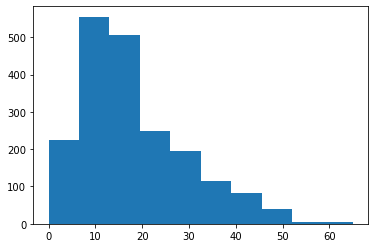

In [128]:
plt.hist(td['Experience'])
plt.show()

### Observations:
        - Doctors 'Experience' ranges from 0 to 70 years.
        - Majority of Doctors 'Experience' ranges from 10 to 20 years.

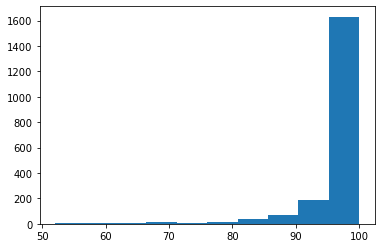

In [129]:
plt.hist(td['Rating'])
plt.show()

### Observations:
        Majority of Doctors have 'Rating' of 90% to 100%.

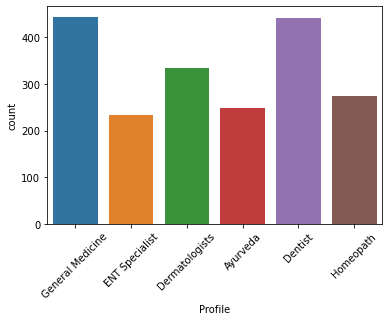

In [130]:
sns.countplot(td['Profile'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Majority of Doctors are Dentist, General Medicine practitioner, Dermatologists, Homeopath.   

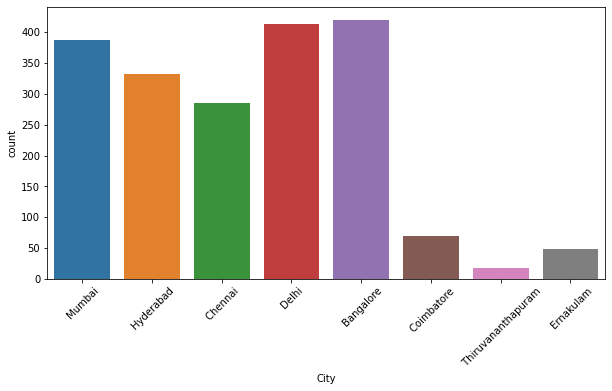

In [131]:
plt.figure(figsize=(10,5))
sns.countplot(td['City'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Majority of Doctors are from Bangalore, Delhi, Mumbai, Hyderabad.               

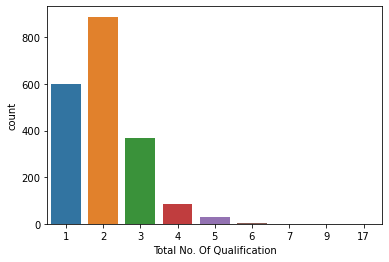

In [132]:
sns.countplot(td['Total No. Of Qualification'])
plt.show()

### Observations:
        Majority of Doctors have Single to Double Degree. 

## Bivariate Analysis

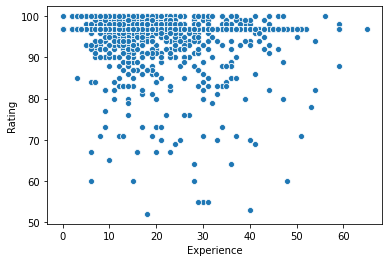

In [133]:
sns.scatterplot(td['Experience'],td['Rating'])
plt.show()

### Observations:
        Majority of Doctors above 10 years of Experience have good 'Rating'.

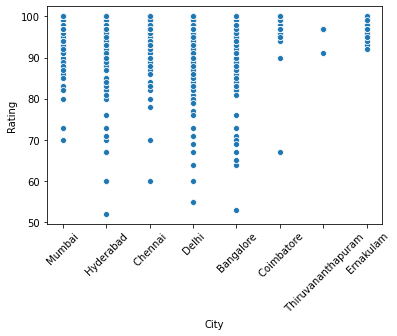

In [134]:
sns.scatterplot(td['City'],td['Rating'])
plt.xticks(rotation=45)
plt.show()

### Observations:
        Ernakulam, Thiruvananthapuram, Coimbatore, Mumbai Doctors have good 'Rating'.

In [135]:
td['Area'].unique()

array(['Ghatkopar East', 'West Marredpally', 'KK Nagar',
       'New Ashok Nagar', 'Kanakpura Road', 'Velachery', 'Frazer Town',
       'Attapur', 'Banashankari', 'Mayur Vihar Ph-I', 'Erragadda',
       'Gandhipuram', 'Kemps Corner', 'Banjara Hills', 'Madandapuram',
       'Mukherjee Nagar', 'Tis Hazari', 'Banashankari 2nd Stage',
       'Nagawara', 'Basavanagudi', 'Dadar', 'Kattakada', 'Villivakkam',
       'Begumpet', 'Kottivakkam', 'Jeedimetla', 'Gachibowli', 'Chromepet',
       'Mulund West', 'Bellandur', 'Kukatpally', 'Chandni Chowk',
       'Vileparle West', 'Sakinaka', 'Bannerghatta Road', 'Marathahalli',
       'Kolathur', 'Jayanagar 9 Block', 'Dilsukhnagar', 'Dahisar East',
       'Keelkattalai', 'LB Nagar', 'Jayanagar 4 Block', 'Patparganj',
       'Andheri East', 'Ganesh Nagar', 'Powai', 'Whitefield',
       'Andheri West', 'Thanisandra', 'Gulmohar Park', 'Aminjikarai',
       'HSR Layout', 'Greater Kailash Part 2', 'Tripunithura',
       'Tambaram East', 'Chembur', 'Aluva',

In [136]:
td.drop('Area',axis=1,inplace=True)

### Let's Convert Categorical column into Numerical column.

In [137]:
profile=td['Profile']
profile=pd.get_dummies(profile)
profile.head()

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [138]:
city=td['City']
city=pd.get_dummies(city)
city.head()

,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0


In [139]:
td=pd.concat([td,profile,city],axis=1)

In [140]:
td.drop(['Profile','City'],axis=1,inplace=True)

## Checking Outliers

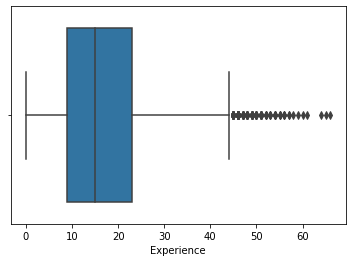

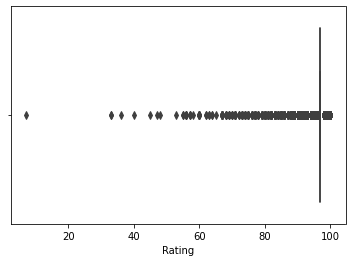

In [141]:
for col in ['Experience','Rating']:
    sns.boxplot(df[col])
    plt.show()

### Observations:
        From above boxplots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [144]:
z=np.abs(zscore(td))

In [145]:
np.where(z>3)

(array([   2,   11,   17,   21,   54,   58,   65,   72,   95,   96,  101,
         104,  107,  118,  131,  139,  154,  157,  165,  168,  195,  214,
         219,  222,  227,  258,  261,  264,  264,  265,  283,  303,  336,
         355,  357,  362,  370,  386,  398,  406,  412,  436,  445,  446,
         448,  449,  454,  481,  483,  488,  509,  513,  530,  564,  565,
         593,  602,  604,  617,  622,  641,  651,  652,  664,  671,  676,
         677,  699,  709,  723,  724,  729,  760,  769,  772,  773,  775,
         776,  777,  781,  783,  793,  795,  800,  801,  818,  864,  866,
         873,  877,  888,  894,  896,  928,  936,  938,  963,  968,  970,
         975,  988,  989,  991,  991,  995, 1000, 1033, 1043, 1048, 1060,
        1080, 1088, 1093, 1098, 1103, 1120, 1158, 1161, 1163, 1169, 1173,
        1185, 1199, 1222, 1231, 1242, 1244, 1258, 1268, 1282, 1285, 1286,
        1286, 1292, 1295, 1296, 1298, 1331, 1332, 1335, 1345, 1349, 1372,
        1382, 1385, 1392, 1402, 1403, 

In [146]:
# Threshold=3
test=td[(z<3).all(axis=1)]

In [147]:
print(td.shape,'\t\t',test.shape)

(1976, 17) 		 (1776, 17)


In [148]:
# percentage loss of data
per_loss = ((1976-1776)/1976)*100
per_loss

10.121457489878543

### Since significant amount (> 5%) of data is lost during outlier removal, we are not going with Z-score method of removing outliers.

## Checking Skewness

In [149]:
td.skew()

Experience                     0.967446
Rating                        -4.222297
Total No. Of Qualification     2.688581
Ayurveda                       2.255581
Dentist                        1.330680
Dermatologists                 1.767575
ENT Specialist                 2.363737
General Medicine               1.320194
Homeopath                      2.092681
 Bangalore                     1.406303
 Chennai                       2.021020
 Coimbatore                    5.030279
 Delhi                         1.428667
 Ernakulam                     6.184628
 Hyderabad                     1.772394
 Mumbai                        1.529925
 Thiruvananthapuram           10.649701
dtype: float64

### Observations:
        Acceptable range of skewness is +/- 0.5, hence data is skewed.

## Removing Skewness

In [150]:
td=power_transform(td,method='yeo-johnson')

## Standardizing Data

In [152]:
sc=StandardScaler()
td=sc.fit_transform(td)

# Loading Model

In [153]:
gbr = joblib.load('Fees_Model(Regressor).obj')

## Predicting Doctors 'Fees' using Regressor Model

In [154]:
f1 = gbr.predict(td)

In [155]:
Fees1=pd.DataFrame({'Fees1':f1})
Fees1

,Fees1
0,252.854050
1,365.720970
2,357.645894
3,246.238273
4,280.555458
...,...
1971,276.078743
1972,347.833325
1973,316.402725
1974,209.536771


In [156]:
# Saving the predicted 'Fees' in a csv file
Fees1.to_csv('Fees1')

In [157]:
gbc = joblib.load('Fees_Model(Classifier).obj')

## Predicting Doctors 'Fees' using Classifier Model

In [158]:
f2 = gbc.predict(td)

In [159]:
Fees2=pd.DataFrame({'Fees2':f2})
Fees2

,Fees2
0,0
1,1
2,1
3,0
4,0
...,...
1971,0
1972,1
1973,0
1974,0


In [160]:
# Saving the predicted 'Fees' in a csv file
Fees2.to_csv('Fees2')